# Classical Machine Learning Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
data = pd.read_csv("C:\\Users\\SHANMUGAPRIYAA\\Downloads\\Live.csv")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas']
X = data[features].values

In [4]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
data['Cluster'] = labels
cluster_centers = kmeans.cluster_centers_

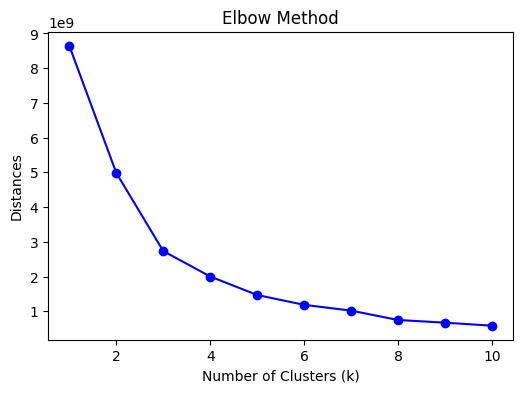

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distances')
plt.title('Elbow Method')
plt.show()

In [6]:
sse = kmeans.inertia_
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
print("SSE:", sse)
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", davies_bouldin)

SSE: 2735237024.309437
Silhouette Score: 0.8121487911423703
Davies-Bouldin Score: 0.5515453644859349


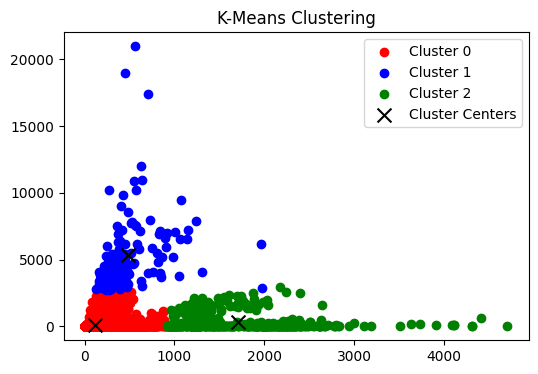

In [7]:
plt.figure(figsize=(6, 4))
colors = ['red', 'blue', 'green']
for cluster in range(k):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster], label='Cluster {}'.format(cluster))
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', s=100, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Quantum Machine learning 

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

In [9]:
file_path = r"C:\Users\SHANMUGAPRIYAA\Downloads\Live.csv"
df = pd.read_csv(file_path)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [10]:
features = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas']
X = df[features].fillna(0).values

In [11]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_quantum = X_scaled[:6, :2]

In [12]:
def normalize(v):
    norm = np.linalg.norm(v)
    return v / norm if norm != 0 else v
vec1 = normalize(X_quantum[0])
vec2 = normalize(X_quantum[1])

In [13]:
qc = QuantumCircuit(3, 1)
qc.h(0)
qc.initialize(vec1, 1)
qc.initialize(vec2, 2)
qc.cswap(0, 1, 2)
qc.h(0)
qc.measure(0, 0)

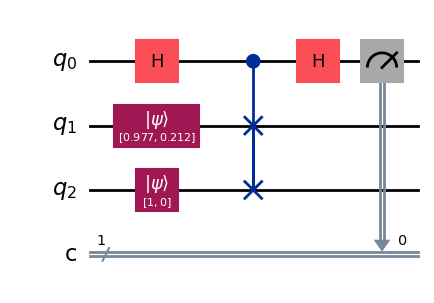

In [14]:
qc.draw("mpl")

In [15]:
backend = AerSimulator()
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
print("Swap Test Measurement Counts:", counts)

Swap Test Measurement Counts: {'0': 1001, '1': 23}


In [16]:
qc_sv = QuantumCircuit(3)
qc_sv.h(0)
qc_sv.initialize(vec1, 1)
qc_sv.initialize(vec2, 2)
qc_sv.cswap(0, 1, 2)
qc_sv.h(0)
statevector = Statevector.from_instruction(qc_sv)
probabilities = np.abs(statevector.data) ** 2
print("\nQuantum State Probabilities (Before Measurement):")
for i, prob in enumerate(probabilities):
    print(f"State |{i:03b}⟩: {prob:.4f}")


Quantum State Probabilities (Before Measurement):
State |000⟩: 0.9550
State |001⟩: 0.0000
State |010⟩: 0.0113
State |011⟩: 0.0113
State |100⟩: 0.0113
State |101⟩: 0.0113
State |110⟩: 0.0000
State |111⟩: 0.0000


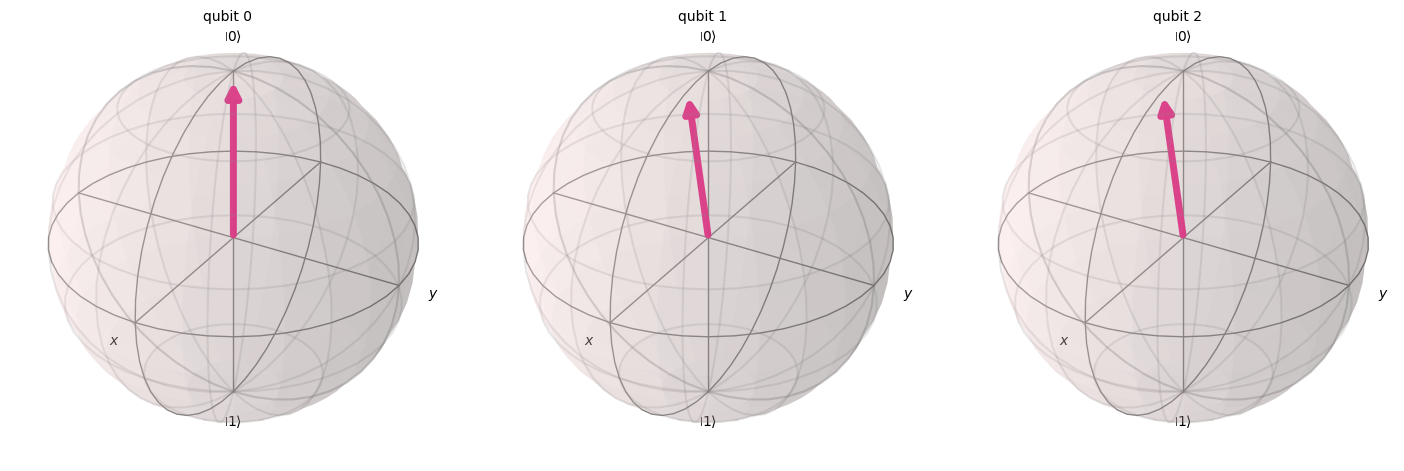

<Figure size 640x480 with 0 Axes>

In [17]:
plt.suptitle("Bloch Sphere Representation")
plot_bloch_multivector(statevector)

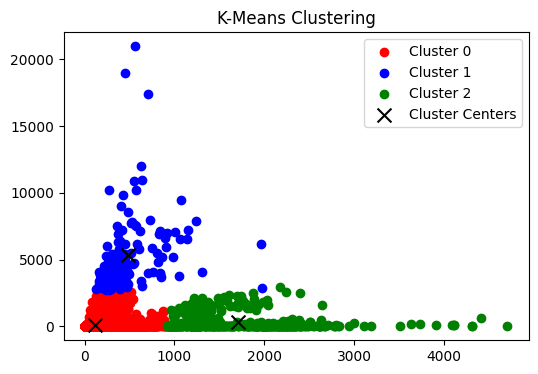

In [18]:
plt.figure(figsize=(6, 4))
colors = ['red', 'blue', 'green']
for cluster in range(k):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster], label='Cluster {}'.format(cluster))
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', s=100, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [19]:
sse = kmeans.inertia_
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
print("SSE:", sse)
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", davies_bouldin)

SSE: 2735237024.309437
Silhouette Score: 0.8121487911423703
Davies-Bouldin Score: 0.5515453644859349
